![EncabezadoIN](EncabezadoIN.JPG)

## Laboratorio 1 - Agrupación (Clustering)

Integrantes: 
Juan Pablo Lora Hernández - 202012524 

Andrés Francisco Borda Rincón - 201729184

Gabriela Vargas Rojas - 202013830

## Caso 
Los sistemas de recomendación han revolucionado la forma en que los usuarios descubren contenido en plataformas de streaming. Estos sistemas utilizan técnicas de aprendizaje automático para predecir las preferencias de los usuarios y ofrecerles contenido relevante. Así, uno de los desafíos clave para este laboratorio, en la construcción de estos sistemas es identificar las características de las películas que influyen en las calificaciones y gustos de los usuarios.
El comprender mejor el aporte que pueden brindar los sistemas de recomendación a una empresa de streaming, motivó a MovieAlpes a iniciar este proyecto. MovieAlpes es una empresa de streaming que quiere ser más efectiva en sus recomendaciones para mantener a sus usuarios satisfechos y, a su vez, capturar nuevos espectadores. Para ello, ha decidido emprender un proyecto para conocer cuáles son los factores que inciden en las calificaciones positivas de los productos que ofrece y entender mejor a sus usuarios. Para realizar este estudio ha recopilado un conjunto de datos que contiene información detallada sobre un amplio espectro de películas, series y mini series de TV, que incluye género, año de lanzamiento, duración, puntuación, entre otros atributos relevantes.
MovieAlpes los ha contactado para realizar este proceso de caracterización e identificación de patrones que puedan ser utilizados para entender las preferencias de sus usuarios e identificar los atributos que influyen en las calificaciones positivas. La idea es mejorar significativamente la experiencia de estos al proporcionar recomendaciones más relevantes y adaptadas a sus gustos individuales. Dados los procesos internos que en la actualidad lleva a cabo MovieAlpes a nivel de aprendizaje automático, requiere que la solución que brinde al problema plateado, sea basada en una tarea de agrupación.

## 1. Carga de librerías necesarias para implementación

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import ParameterGrid

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots


## 2. Cargar los datos

In [2]:
# Se cargan los datos. 
df_movies=pd.read_csv('./Datos_Agrupación_data_MovieAlpes_data.csv', sep=';', encoding = "ISO-8859-1")

## 3. Entendimiento de los datos 

### 3.1. Perfilamiento de datos

In [3]:
df_movies.shape

(7471, 18)

In [4]:
df_movies.head()

#  index     tconst titleType  \
0   1      1  tt0103064     movie   
1  10     17  tt0231050  tvSeries   
2  13     23  tt0253474     movie   
3  21     55  tt0369339     movie   
4  28     87  tt0439547     movie   

                                       originalTitle  isAdult  startYear  \
0                         Terminator 2: Judgment Day      0.0     1991.0   
1                    ToransufÃÂ´mÃÂ¢: KÃÂ¢robotto      0.0     2000.0   
2                                        The Pianist      0.0     2002.0   
3                                         Collateral      0.0     2004.0   
4  2 Filhos de Francisco: A HistÃÂ³ria de ZezÃÂ...      0.0     2005.0   

  runtimeMinutes  averageRating   numVotes  ordering region language  \
0            137            8.6  1128166.0      17.0     US       en   
1             22            6.6      577.0      16.0     US       en   
2            150            8.5   860569.0       7.0     US       en   
3            120            7.5   417391.0       6.0     US       en   
4            132            6.9     5946.0       5.0     US       en   

         types attributes  isOriginalTitle main_genre secondary_genre  
0          dvd         \N              0.0     Action          Sci-Fi  
1  alternative         \N              0.0     Action       Adventure  
2  imdbDisplay         \N              0.0  Biography           Drama  
3  imdbDisplay         \N              0.0     Action           Crime  
4  imdbDisplay         \N              0.0  Biography           Drama

In [5]:
# Revisar las características de los datos: completitud y tipo de dato
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7471 entries, 0 to 7470
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                7471 non-null   int64  
 1   index            7471 non-null   int64  
 2   tconst           7471 non-null   object 
 3   titleType        7471 non-null   object 
 4   originalTitle    7471 non-null   object 
 5   isAdult          7470 non-null   float64
 6   startYear        7470 non-null   float64
 7   runtimeMinutes   7470 non-null   object 
 8   averageRating    7470 non-null   float64
 9   numVotes         7470 non-null   float64
 10  ordering         7470 non-null   float64
 11  region           7470 non-null   object 
 12  language         7470 non-null   object 
 13  types            7470 non-null   object 
 14  attributes       7470 non-null   object 
 15  isOriginalTitle  7470 non-null   float64
 16  main_genre       7470 non-null   object 
 17  secondary_genr

In [6]:
# Resumen de los estadisticos de las variables numéricas
df_movies_num = df_movies[['#', 'index', 'startYear', 'averageRating', 'ordering', 'numVotes']].copy()
df_movies_num.describe()


#         index    startYear  averageRating     ordering  \
count  7471.000000   7471.000000  7470.000000    7470.000000  7470.000000   
mean   4043.482666   5440.458439  2013.157296       7.475676    16.567604   
std    2192.753689   2752.820924     6.979151       2.771444    12.761147   
min       1.000000      1.000000  1990.000000       6.500000     1.000000   
25%    2152.500000   3073.500000  2008.000000       6.900000     6.000000   
50%    4033.000000   5421.000000  2015.000000       7.300000    14.000000   
75%    5914.500000   7641.500000  2019.000000       7.800000    24.000000   
max    7849.000000  10274.000000  2023.000000      92.000000   119.000000   

           numVotes  
count  7.470000e+03  
mean   7.282830e+04  
std    1.640233e+05  
min    1.000000e+01  
25%    6.265250e+03  
50%    1.527900e+04  
75%    5.641975e+04  
max    2.197234e+06

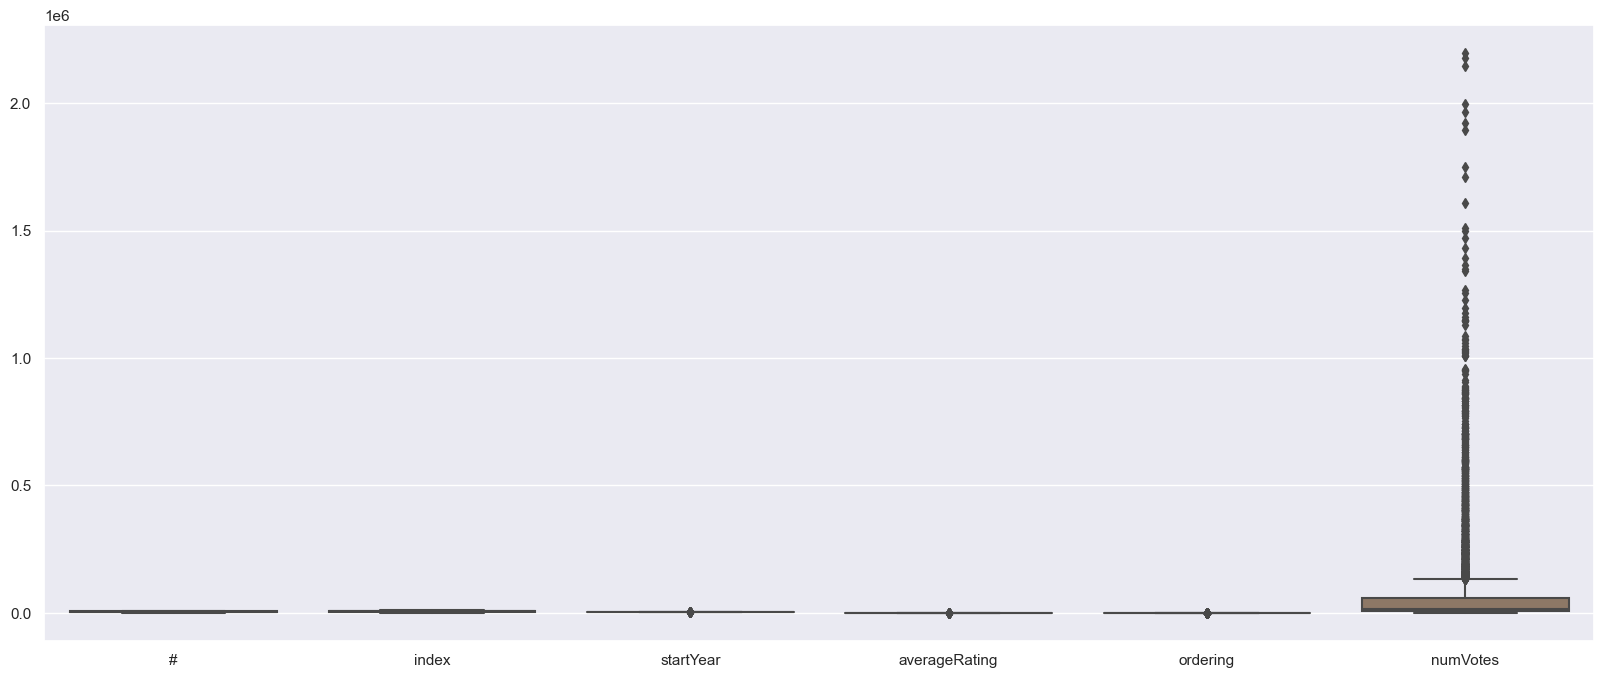

In [7]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies_num, orient ="v")


In [8]:
# Explorar las variables que no son numéricas
name_cols_non_number = df_movies.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['tconst', 'titleType', 'originalTitle', 'runtimeMinutes', 'region',
       'language', 'types', 'attributes', 'main_genre', 'secondary_genre'],
      dtype='object')

In [9]:
#Revisar el contenido de las variables que no son numéricas, en este caso son categóricas
df_movies[name_cols_non_number].describe()

tconst titleType originalTitle runtimeMinutes region language  \
count        7471      7471          7471           7470   7470     7470   
unique       7466         7          7290            362      4        1   
top     tt0395843     movie          Home             60     IN       en   
freq            2      4673             3            534   5590     7470   

              types attributes main_genre secondary_genre  
count          7470       7470       7470            7470  
unique            5          1         22              26  
top     imdbDisplay         \N      Drama           Drama  
freq           7395       7470       1767            2428

### 3.2. Análisis de calidad de datos

### 3.2.1 Completitud - Análisis de valores nulos o vacíos

In [10]:
# Cálculo de porcentaje de valores nulos por columna
((df_movies.isnull().sum()/df_movies.shape[0])).sort_values(ascending=False)

numVotes           0.000134
ordering           0.000134
main_genre         0.000134
isOriginalTitle    0.000134
attributes         0.000134
types              0.000134
language           0.000134
region             0.000134
secondary_genre    0.000134
averageRating      0.000134
runtimeMinutes     0.000134
startYear          0.000134
isAdult            0.000134
index              0.000000
originalTitle      0.000000
titleType          0.000000
tconst             0.000000
#                  0.000000
dtype: float64

### 3.2.2 Unicidad

In [11]:
#Se revisa si hay registros duplicados
df_movies.duplicated(keep = False).sum()

6

### 3.2.3 Consistencia

In [12]:
# Se revisa la variable titleType 
df_movies.titleType.value_counts()

movie           4673
tvSeries        2340
tvMiniSeries     379
tvMovie           70
MOVIE              5
MOvie              3
Movie              1
Name: titleType, dtype: int64

### 3.2.4 Validez

Para la columna “runtimeMinutes” hay 98 registros que a pesar de no estar vacíos tienen como información “/N” lo cual no es un dato válido teniendo en cuenta que aquí encontramos información sobre la duración de la película o serie. De esta manera, en este campo para esos 98 registros no hay una validez. Este analisis fue realizado con Power BI al cargar los datos y con filtros en Excel

### 3.2.5 Reporte Automático con Profiling


In [13]:
#import pandas_profiling

#profiling =pandas_profiling.ProfileReport(df_movies)
#profiling

### 4.1 Preparar los datos

### 4.1.1  Corrección de Datos


In [14]:
# Identificar los registros incorrectos
#Problema de consistencia para "averageRating"
registros_incorrectos = df_movies[(df_movies['averageRating'] == 68) | (df_movies['averageRating'] == 92)]

In [15]:
# Corregir los valores incorrectos
df_movies.loc[registros_incorrectos.index, 'averageRating'] = registros_incorrectos['averageRating'] / 10.0
# Verificar que los registros corregidos tengan los valores correctos
registros_verificados = df_movies.loc[registros_incorrectos.index]
print(registros_verificados)

         #  index      tconst titleType                        originalTitle  \
6       64    227  tt10687506     movie    The Electrical Life of Louis Wain   
51     242    643   tt4121306     movie                             Lac Gioi   
68     286    734   tt6428150     movie                           Free Dance   
385    653   1214   tt0258000     movie                           Panic Room   
387    656   1219   tt0259534     movie  Ramayana: The Legend of Prince Rama   
558    828   1427   tt0323298     movie                           The Mother   
1281  1561   2347   tt0944947  tvSeries                      Game of Thrones   
1544  1827   2680  tt10741542     movie                               Sherni   
1808  2092   3007  tt11717394  tvSeries                      Country Comfort   
2059  2347   3324  tt12861850     movie             Chandigarh Kare Aashiqui   
2606  2900   4018  tt15341442  tvSeries              The Croods: Family Tree   
3053  3348   4569   tt1884268     movie 

In [16]:
#Registro vacío a eliminar con su 
#Problema de Completitud (Registro Vacío)
registro_a_eliminar = 3367
df_movies_model = df_movies[df_movies['#'] != registro_a_eliminar].copy()

#comprobación
print("Número de filas después de eliminar:", df_movies_model.shape[0])

Número de filas después de eliminar: 7470


In [17]:
# Eliminar registros duplicados y quedarse con uno de cada conjunto de duplicados
#Problema de duplicidad
df_movies_model.drop_duplicates(inplace=True)
#Se revisa si hay registros duplicados
df_movies_model.duplicated(keep = False).sum()



0

In [18]:
#Problema de consistencia columna (titleType)
def corregir_titleType(variacion):
    if variacion in ["MOVIE", "MOvie", "Movie"]:
        return "movie"
    else:
        return variacion

# Aplicar la función a la columna titleType
df_movies_model['titleType'] = df_movies_model['titleType'].apply(corregir_titleType)

# Verificar nuevamente la variable titleType después de corregir
df_movies_model.titleType.value_counts()

movie           4680
tvSeries        2338
tvMiniSeries     379
tvMovie           70
Name: titleType, dtype: int64

In [19]:
#Problema de Validez columna (runtimeMinutes) y conversión a variable númerica 
#Calcular la media por género de película/serie excluyendo los valores "/N"
# Convierte la columna "runtimeMinutes" a tipo numérico
df_movies_model['runtimeMinutes'] = pd.to_numeric(df_movies_model['runtimeMinutes'], errors='coerce')

# Calcula la media por género excluyendo los valores no válidos
media_por_genero = df_movies_model[df_movies_model['runtimeMinutes'].notna()].groupby('titleType')['runtimeMinutes'].mean()

# Función para reemplazar valores no válidos y "/N" con la media por género
def reemplazar_runtime(row):
    if pd.notna(row['runtimeMinutes']) and not pd.isnull(row['runtimeMinutes']):
        return int(row['runtimeMinutes'])
    else:
        return int(media_por_genero.get(row['titleType'], 0))  # Utiliza la media por género o cero si no existe

# Aplicar la función para reemplazar los valores no válidos y "/N"
df_movies_model['runtimeMinutes'] = df_movies_model.apply(reemplazar_runtime, axis=1)

# Verificar que la columna sea de tipo numérico (int64)
print(df_movies_model['runtimeMinutes'].dtype)

int64


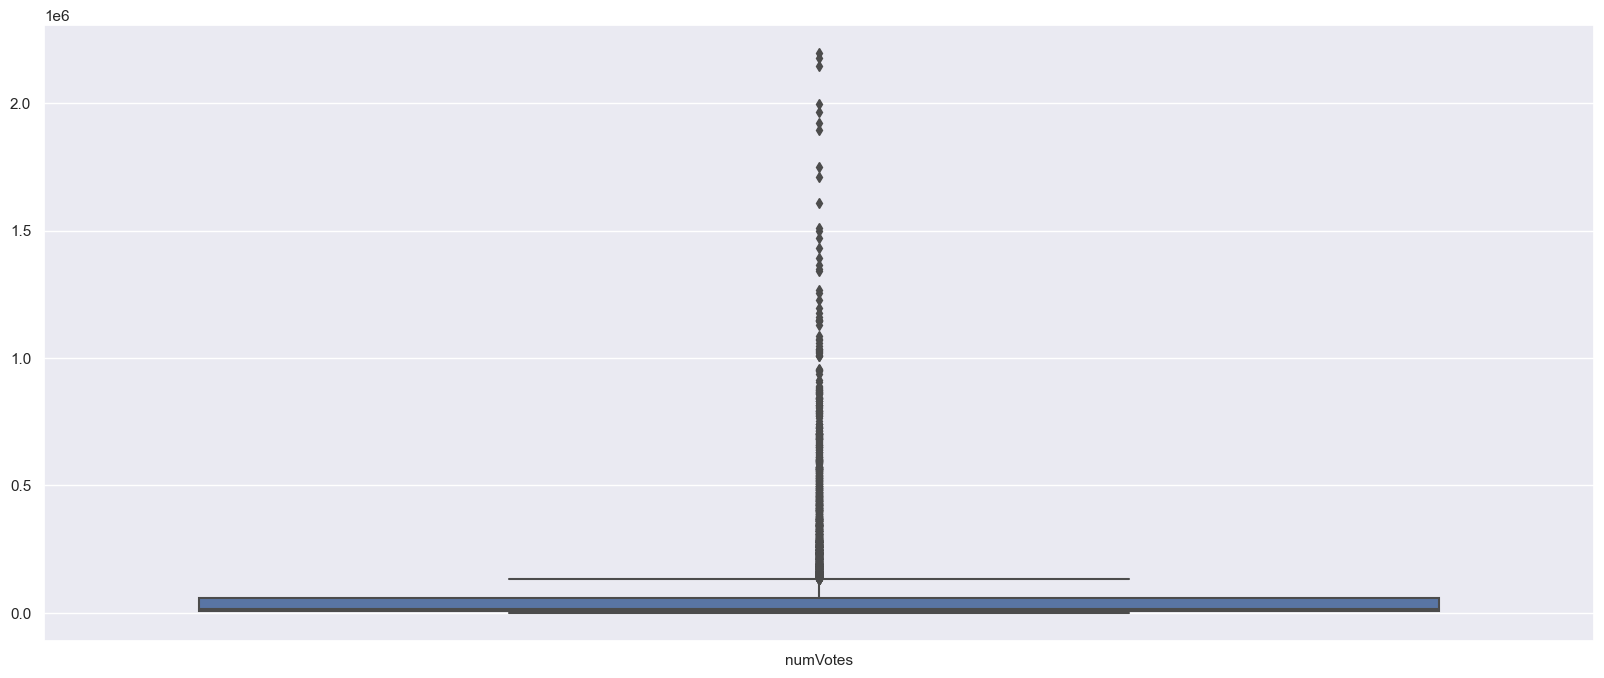

In [20]:
#Ver outliers
df_movies_model_num = df_movies_model[['numVotes']].copy()
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies_model_num, orient ="v")


In [21]:
#Eliminar los outliers numVotes
Q1 = df_movies_model['numVotes'].quantile(0.25)
Q3 = df_movies_model['numVotes'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_movies_model = df_movies_model[(df_movies_model['numVotes'] >= lower_bound) & (df_movies_model['numVotes'] <= upper_bound)]


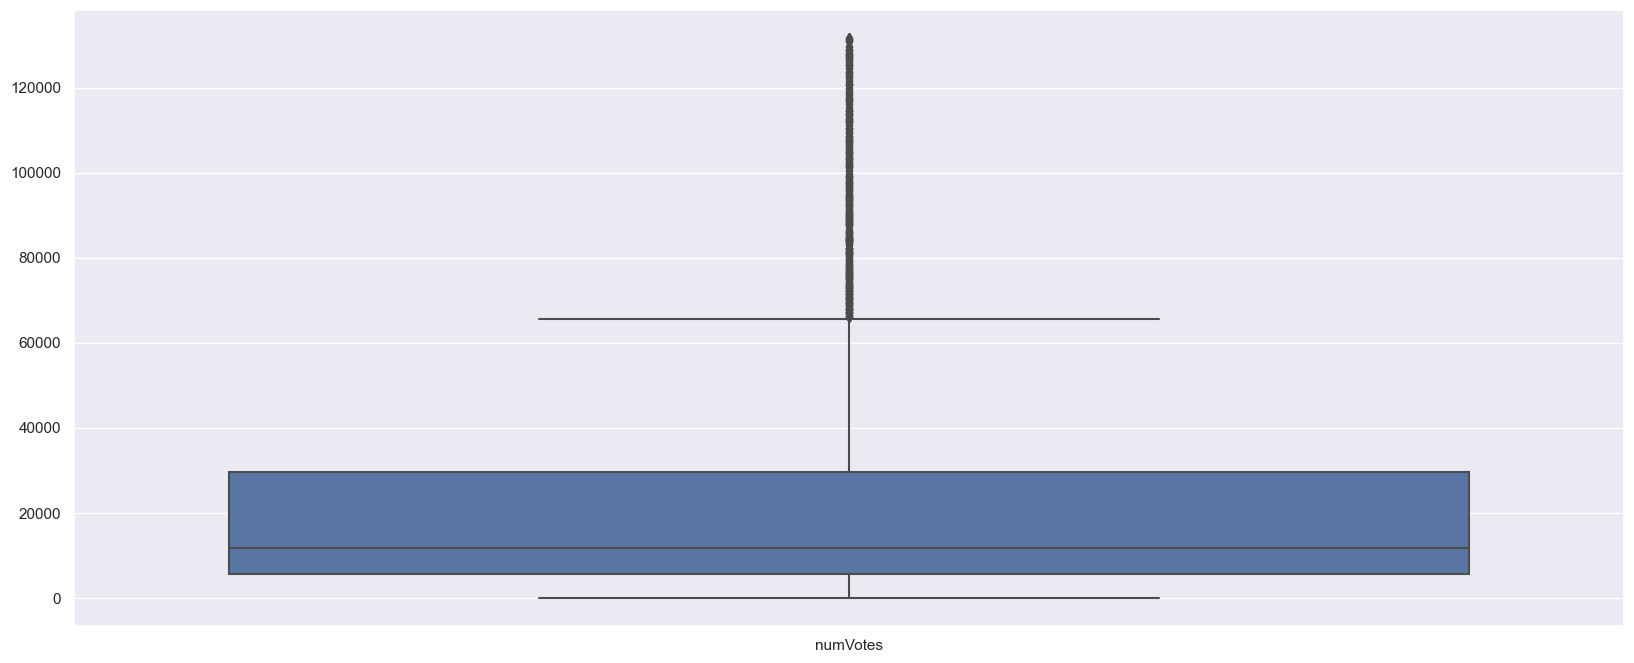

In [22]:
#Analizar nuevamente los valores sin outliers
df_movies_model_num = df_movies_model[['numVotes']].copy()

fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies_model_num, orient ="v")


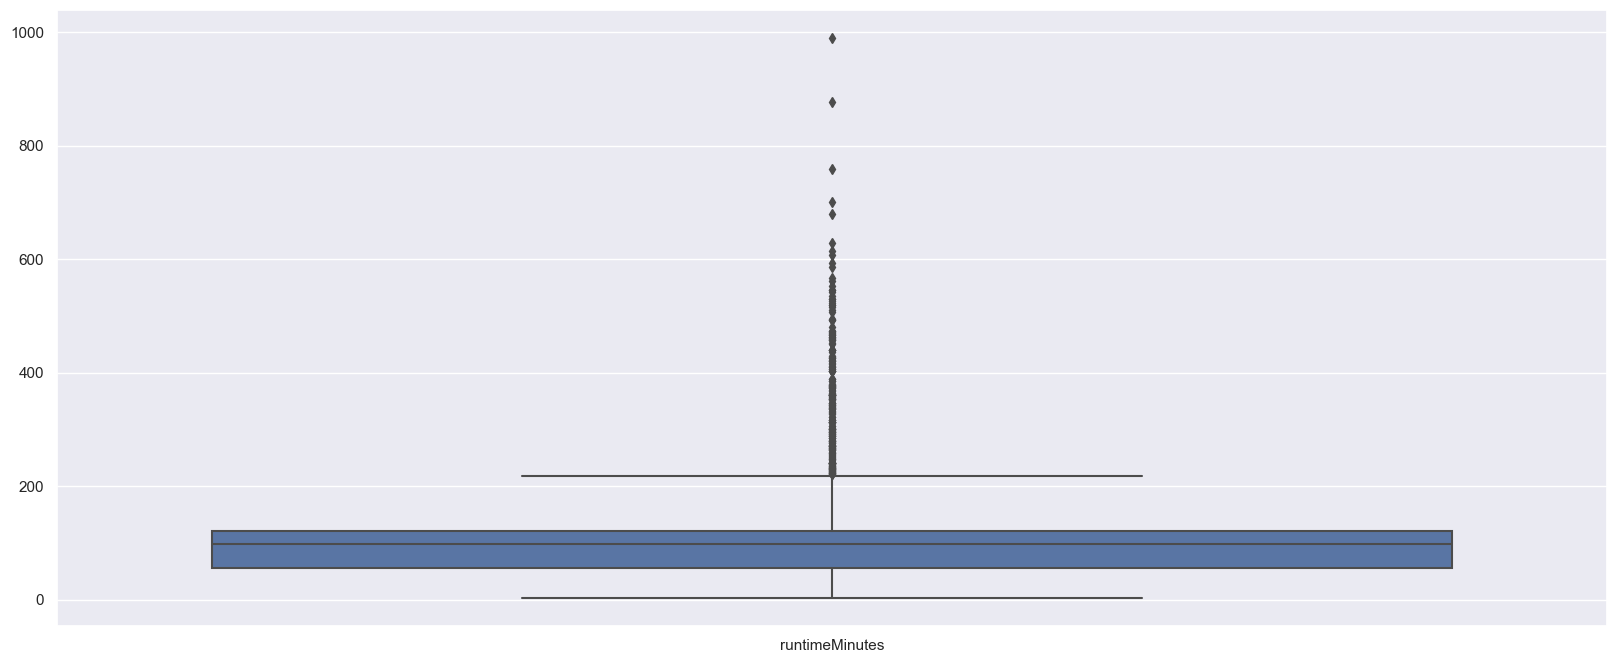

In [23]:
#Ver outliers de runtimeMinutes
df_movies_model_num = df_movies_model[['runtimeMinutes']].copy()

fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies_model_num, orient ="v")


In [24]:
#Eliminar los outliers runtimeMinutes
Q1 = df_movies_model['runtimeMinutes'].quantile(0.25)
Q3 = df_movies_model['runtimeMinutes'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_movies_model = df_movies_model[(df_movies_model['runtimeMinutes'] >= lower_bound) & (df_movies_model['runtimeMinutes'] <= upper_bound)]


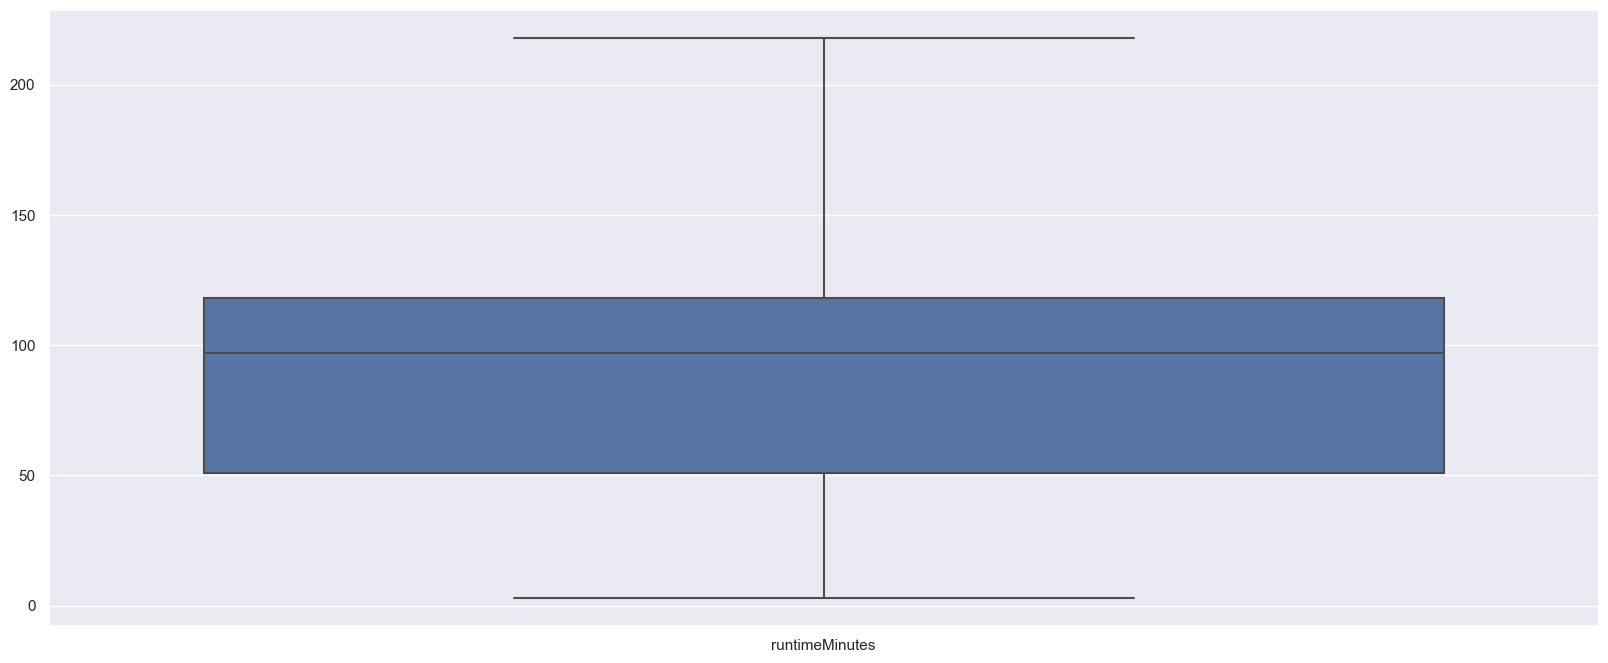

In [25]:
#Analizar nuevamente los valores sin outliers
df_movies_model_num = df_movies_model[['runtimeMinutes']].copy()

fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies_model_num, orient ="v")


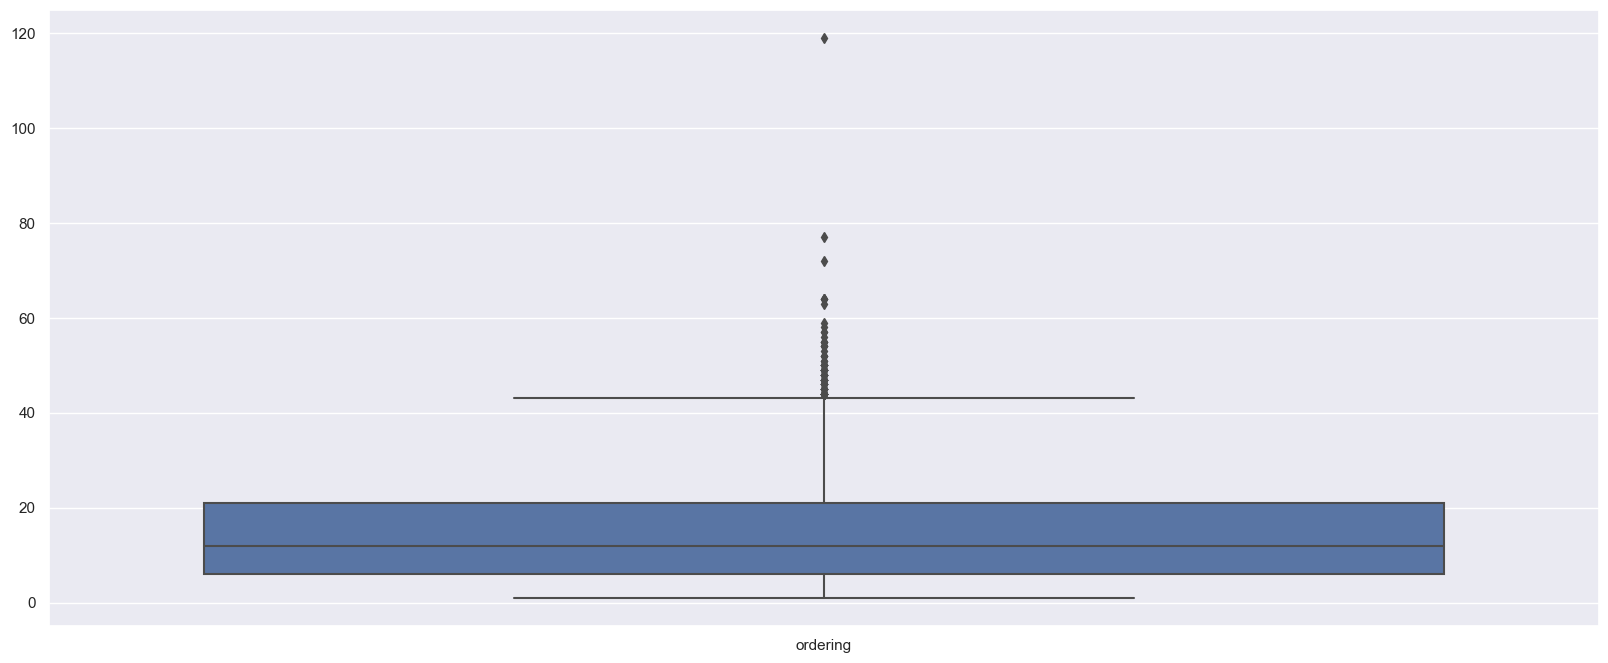

In [26]:
#Ver outliers de startYear
df_movies_model_num = df_movies_model[['ordering']].copy()

fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies_model_num, orient ="v")

In [27]:
#Eliminar los outliers startYear
Q1 = df_movies_model['ordering'].quantile(0.25)
Q3 = df_movies_model['ordering'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_movies_model = df_movies_model[(df_movies_model['ordering'] >= lower_bound) & (df_movies_model['ordering'] <= upper_bound)]


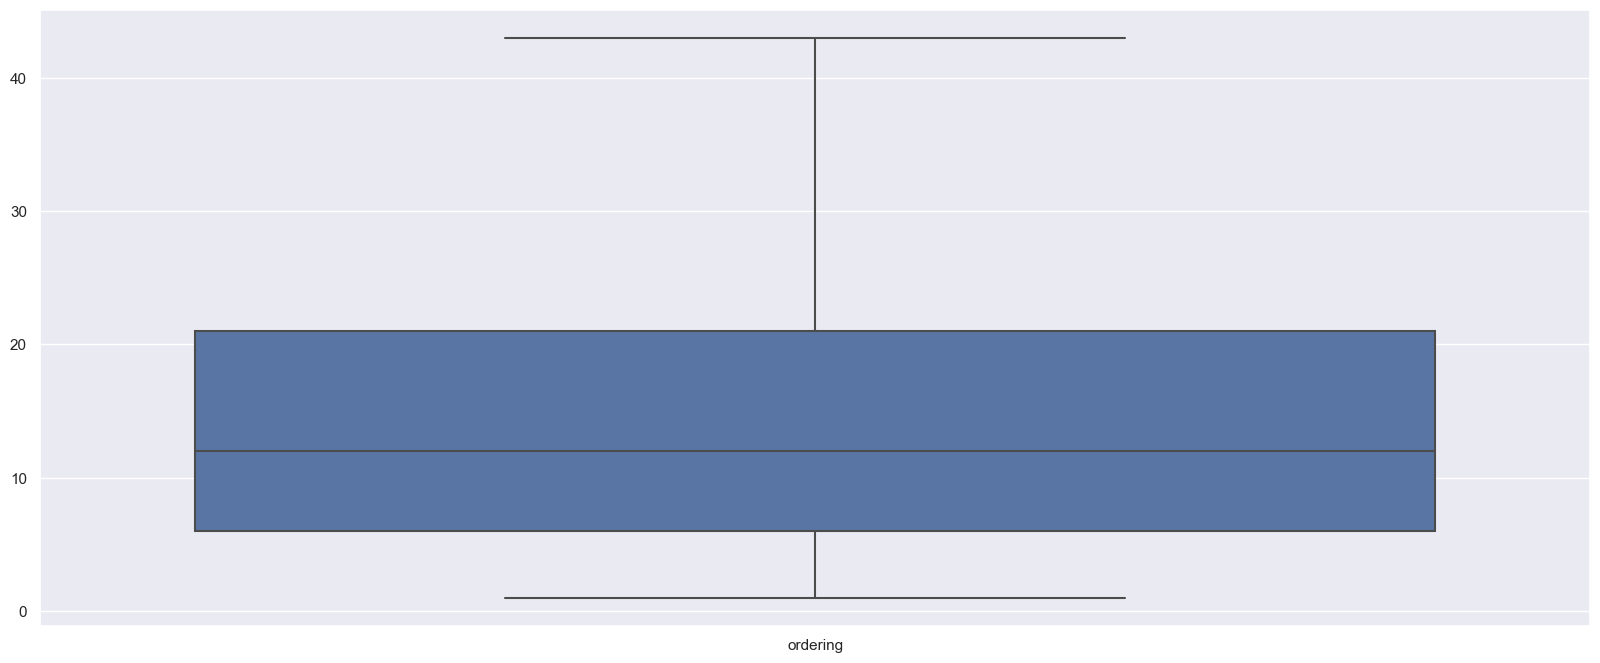

In [28]:
#Ver datos sin outliers
df_movies_model_num = df_movies_model[['ordering']].copy()

fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies_model_num, orient ="v")

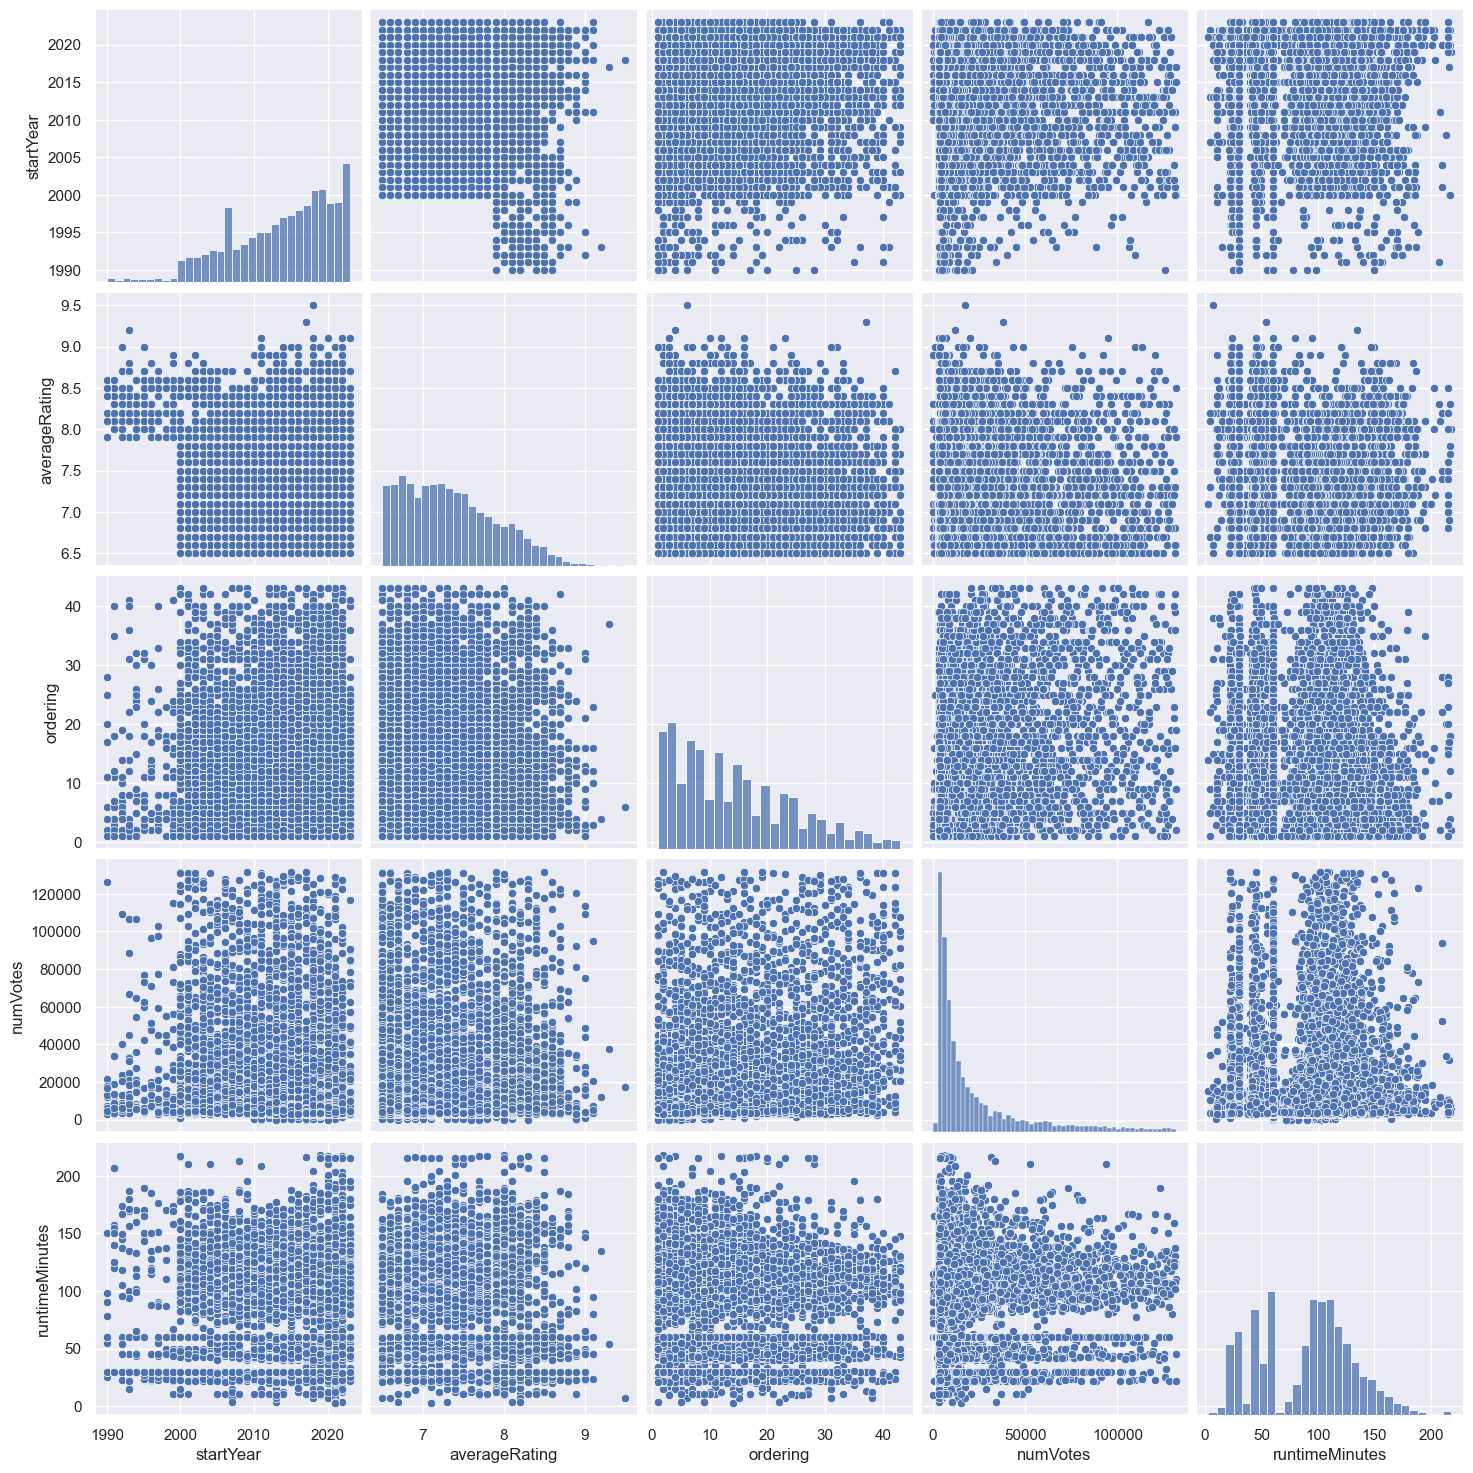

In [29]:
#Vámos las relaciones entre todas las variables numércias
df_movies_model_num = df_movies_model[['startYear', 'averageRating', 'ordering',  'numVotes', 'runtimeMinutes']].copy()
sns.pairplot(df_movies_model_num, height=3,kind='scatter')


In [30]:
df_movies_model.head()

#  index      tconst titleType  \
1  10     17   tt0231050  tvSeries   
4  28     87   tt0439547     movie   
6  64    227  tt10687506     movie   
7  67    244  tt10925770     movie   
9  74    265  tt11247158  tvSeries   

                                       originalTitle  isAdult  startYear  \
1                    ToransufÃÂ´mÃÂ¢: KÃÂ¢robotto      0.0     2000.0   
4  2 Filhos de Francisco: A HistÃÂ³ria de ZezÃÂ...      0.0     2005.0   
6                  The Electrical Life of Louis Wain      0.0     2021.0   
7                         Himeul naeyo, Miseuteo Lee      0.0     2019.0   
9                          The Legend of Vox Machina      0.0     2022.0   

   runtimeMinutes  averageRating  numVotes  ordering region language  \
1              22            6.6     577.0      16.0     US       en   
4             132            6.9    5946.0       5.0     US       en   
6             111            6.8   17455.0      37.0     US       en   
7             111            6.9     487.0       3.0     US       en   
9              30            8.4   35526.0      12.0     US       en   

         types attributes  isOriginalTitle main_genre secondary_genre  
1  alternative         \N              0.0     Action       Adventure  
4  imdbDisplay         \N              0.0  Biography           Drama  
6  imdbDisplay         \N              0.0  Biography           Drama  
7  imdbDisplay         \N              0.0     Comedy           Drama  
9      working         \N              0.0     Action       Adventure

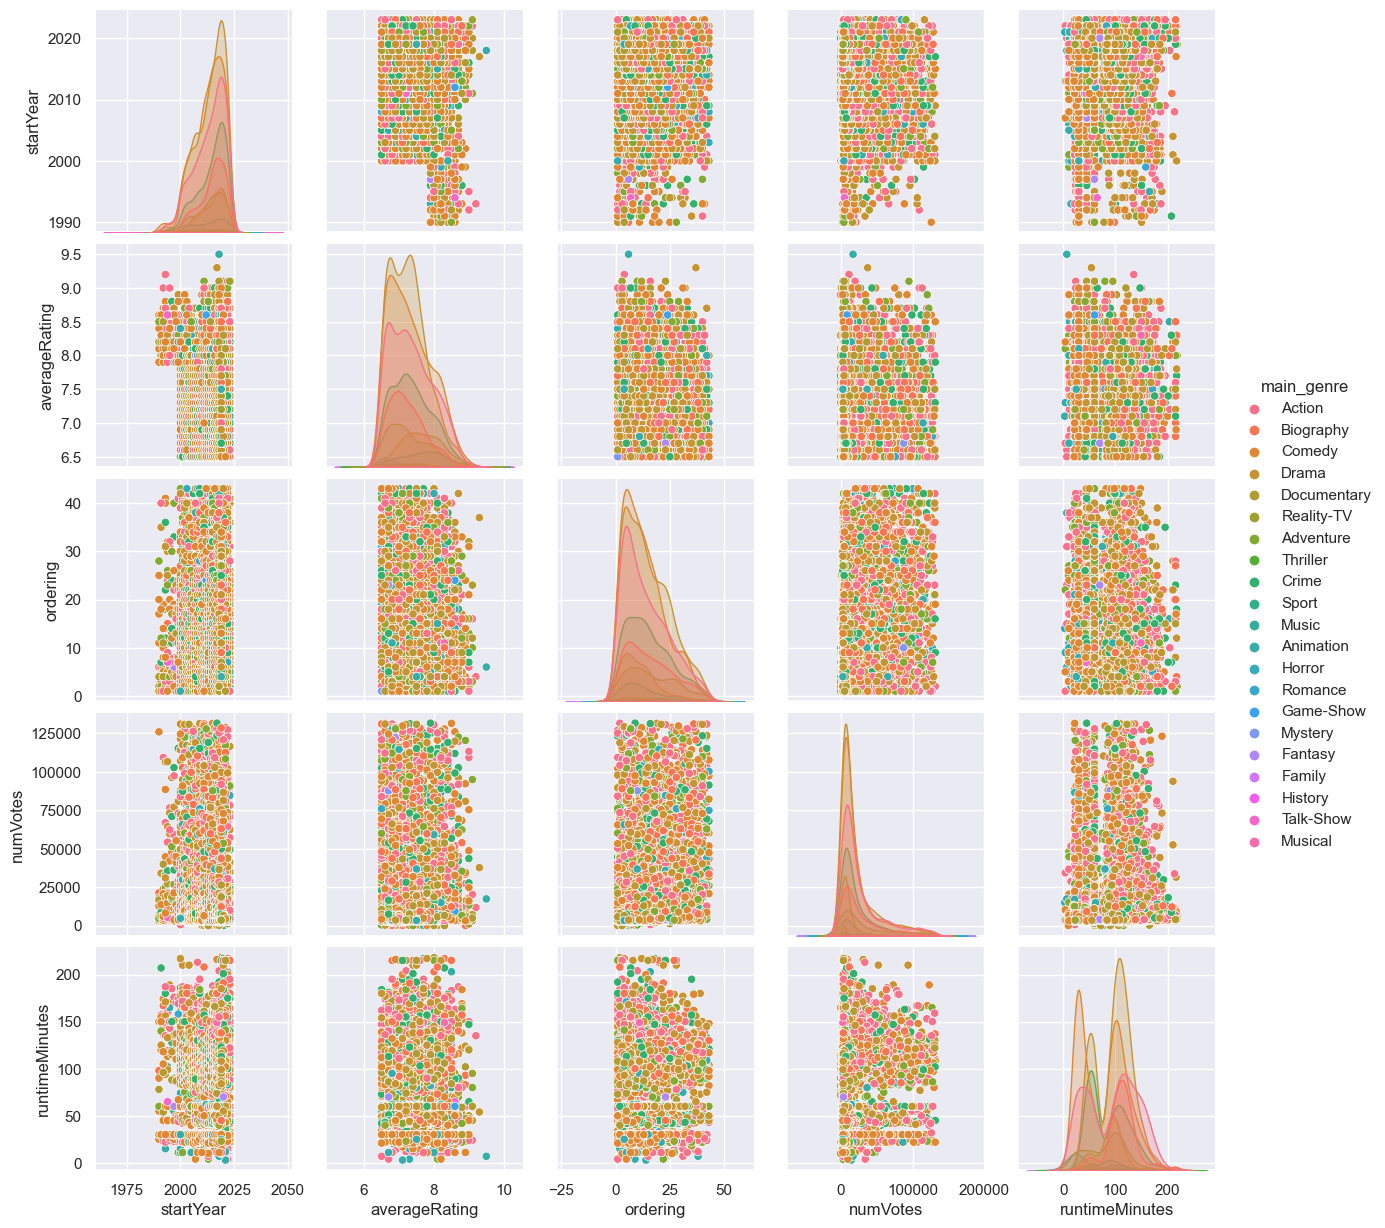

In [32]:
# En esta gráfica se ve las relaciones entre main:genre y las otras variables numéricas
df_movies_model_selec = df_movies_model[['startYear', 'averageRating', 'ordering',  'numVotes', 'runtimeMinutes', 'main_genre']].copy()
sns.pairplot(data=df_movies_model_selec, hue="main_genre")

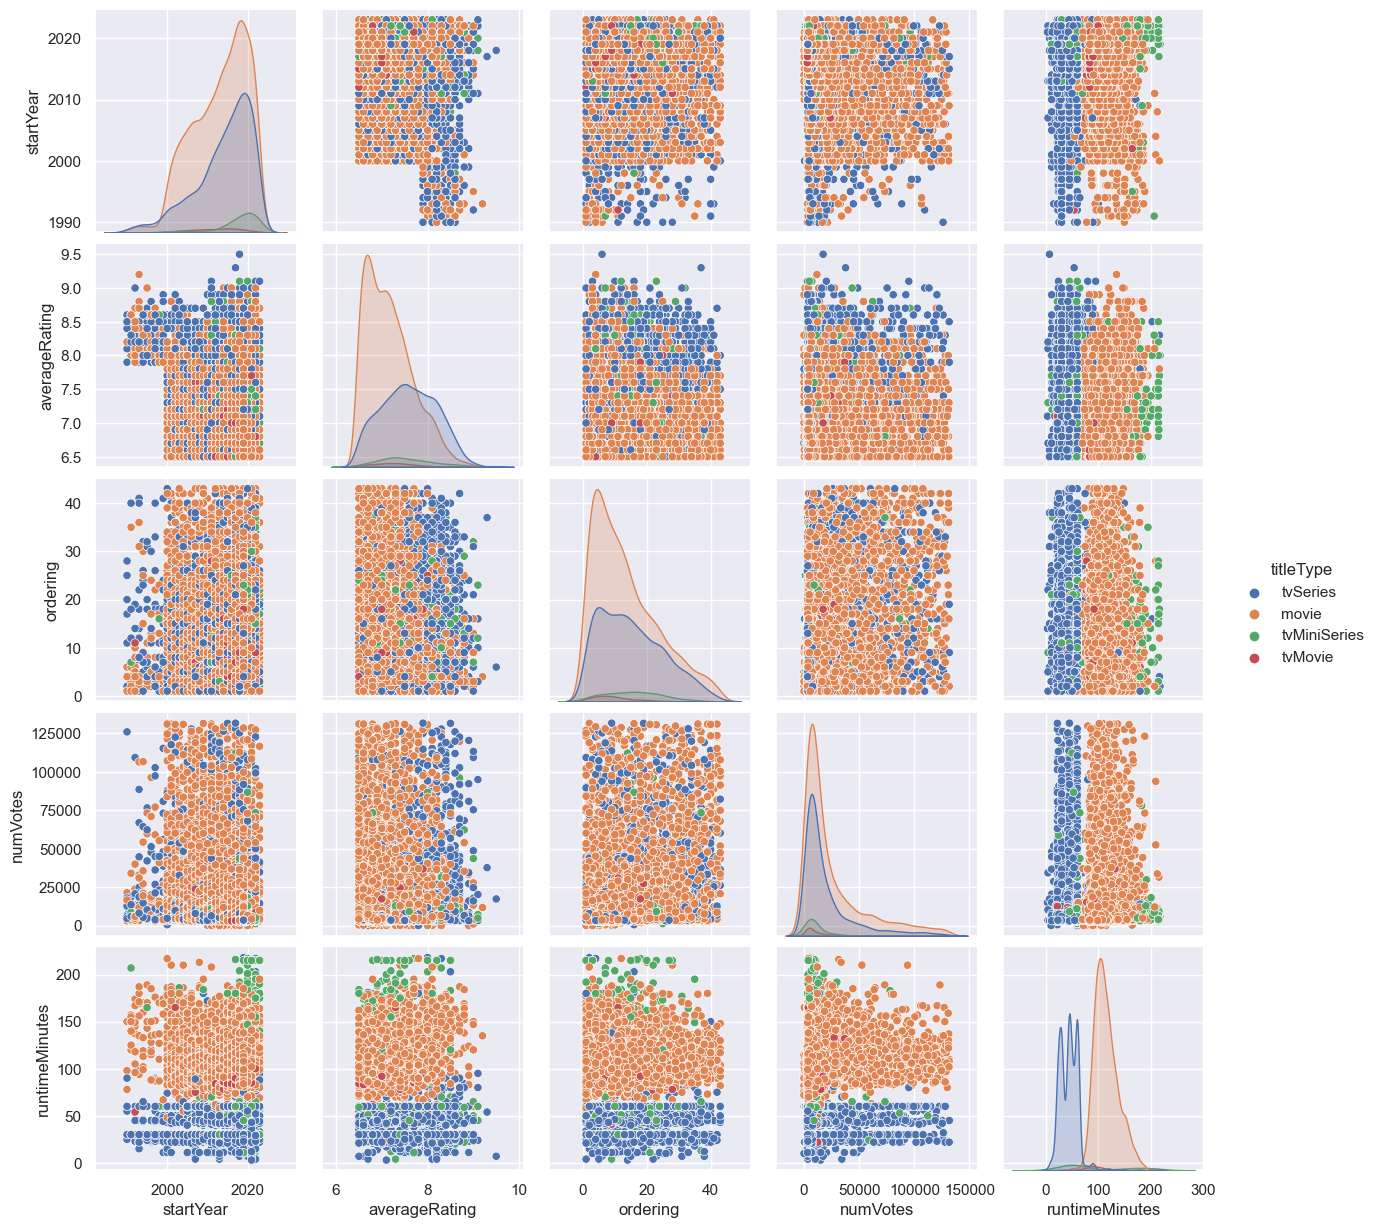

In [33]:
# En esta gráfica se ve las relaciones entre titleType y las otras variables numéricas
df_movies_model_selec = df_movies_model[['startYear', 'averageRating', 'ordering',  'numVotes', 'runtimeMinutes', 'titleType']].copy()
sns.pairplot(data=df_movies_model_selec, hue="titleType")

### 4.2 Selección de Variables a utilizar 

In [34]:
cols_select=["titleType","averageRating", "numVotes"]
cols_number = ["averageRating", "numVotes"]
df_modelk=df_movies_model[cols_select].copy()

In [35]:
#Transformar variable categorica titleType a numerica con OneHotEncoder

cols_category=["titleType"]
enc = OneHotEncoder(handle_unknown='ignore')
transformed = enc.fit_transform(df_movies_model[cols_category])
print(enc.categories_[0])
#Incluir en el dataframe la  transformación de la variable titleType 
df_modelk[enc.categories_[0]] = transformed.toarray()


['movie' 'tvMiniSeries' 'tvMovie' 'tvSeries']


In [36]:
df_modelk.describe()

averageRating       numVotes        movie  tvMiniSeries      tvMovie  \
count    6132.000000    6132.000000  6132.000000   6132.000000  6132.000000   
mean        7.326027   23251.709230     0.608774      0.033431     0.011416   
std         0.581224   27412.706639     0.488065      0.179774     0.106241   
min         6.500000      10.000000     0.000000      0.000000     0.000000   
25%         6.800000    5579.250000     0.000000      0.000000     0.000000   
50%         7.200000   11366.500000     1.000000      0.000000     0.000000   
75%         7.700000   28538.500000     1.000000      0.000000     0.000000   
max         9.500000  131716.000000     1.000000      1.000000     1.000000   

          tvSeries  
count  6132.000000  
mean      0.346380  
std       0.475855  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [37]:
#Guardar el nombre de las variables a utilizar en el modelo, incluyendo las nuevas columnas creadas 
list_cols_transformed =np.array(enc.categories_[0]).tolist()
cols_transformed = cols_number+list_cols_transformed
cols_transformed

['averageRating', 'numVotes', 'movie', 'tvMiniSeries', 'tvMovie', 'tvSeries']

In [38]:
# Vamos a llevar al mismo dominio las diferentes variables
mms= MinMaxScaler()
# transform data
df_movies_prep_norm = mms.fit_transform(df_modelk[cols_transformed])
df_modelk_norm = pd.DataFrame(df_movies_prep_norm, columns =cols_transformed)
df_modelk_norm['titleType'] = df_modelk['titleType']

In [39]:
df_modelk_norm

averageRating  numVotes  movie  tvMiniSeries  tvMovie  tvSeries  \
0          0.033333  0.004305    0.0           0.0      0.0       1.0   
1          0.133333  0.045070    1.0           0.0      0.0       0.0   
2          0.100000  0.132454    1.0           0.0      0.0       0.0   
3          0.133333  0.003622    1.0           0.0      0.0       0.0   
4          0.633333  0.269661    0.0           0.0      0.0       1.0   
...             ...       ...    ...           ...      ...       ...   
6127       0.266667  0.028617    1.0           0.0      0.0       0.0   
6128       0.333333  0.025117    0.0           0.0      0.0       1.0   
6129       0.233333  0.025329    1.0           0.0      0.0       0.0   
6130       0.133333  0.027607    1.0           0.0      0.0       0.0   
6131       0.233333  0.027083    0.0           0.0      0.0       1.0   

     titleType  
0          NaN  
1     tvSeries  
2          NaN  
3          NaN  
4        movie  
...        ...  
6127     movie  
6128  tvSeries  
6129     movie  
6130     movie  
6131  tvSeries  

[6132 rows x 7 columns]

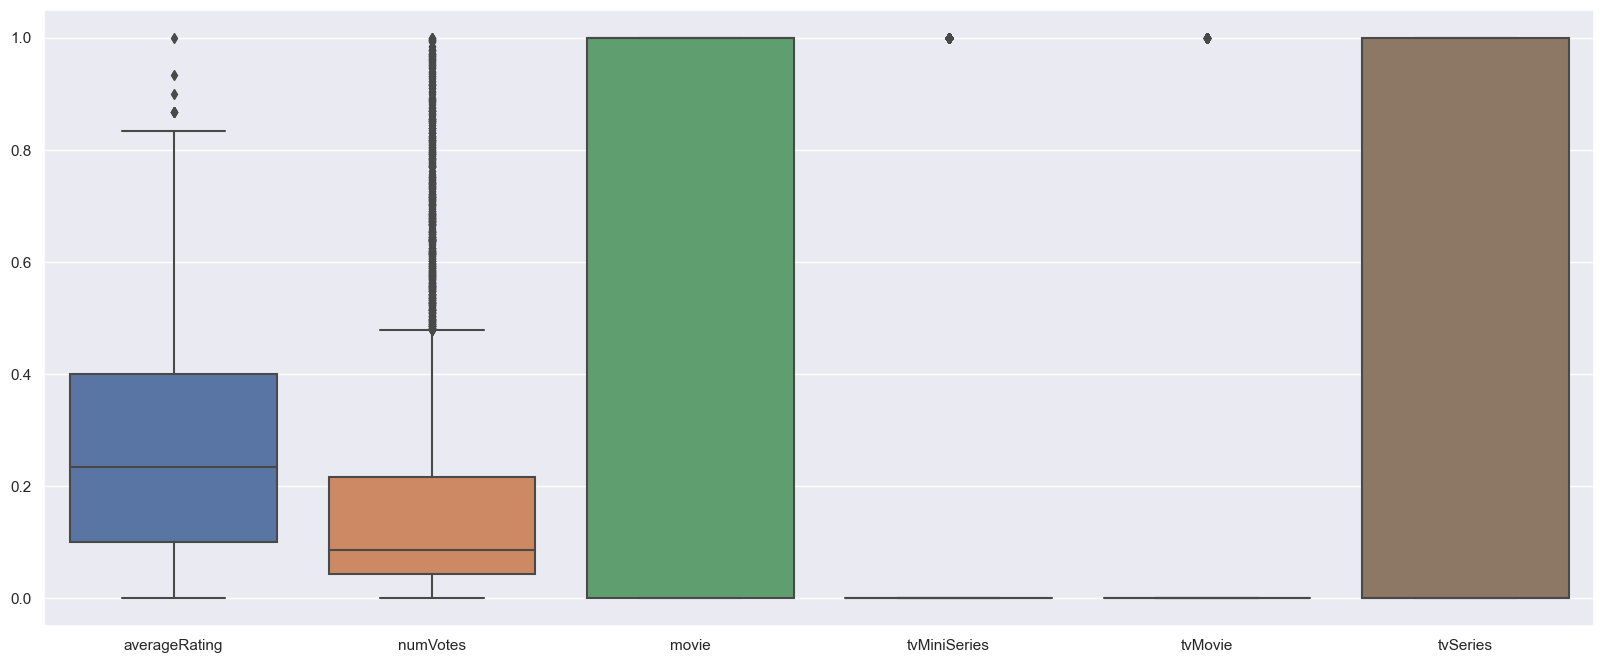

In [40]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_modelk_norm, orient="v")

### 4.3 Encontrar el número óptimo de clústeres utilizando el método del codo

In [41]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

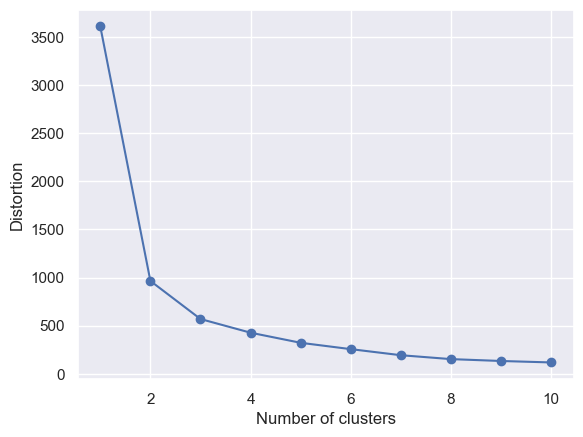

In [42]:
plot_distortion(df_modelk_norm[cols_transformed],1,11)

### 4.4 Contruir el modelo (Algoritmo K-means)

In [43]:
#En este punto generamos el modelo, con los datos preparados y la selección del número de grupos apoyada con el gráfico de silueta.
kmeans = KMeans(n_clusters=3, random_state=0) 
res_kmeans = kmeans.fit(df_modelk_norm[cols_transformed])

In [44]:
df_modelk_norm

averageRating  numVotes  movie  tvMiniSeries  tvMovie  tvSeries  \
0          0.033333  0.004305    0.0           0.0      0.0       1.0   
1          0.133333  0.045070    1.0           0.0      0.0       0.0   
2          0.100000  0.132454    1.0           0.0      0.0       0.0   
3          0.133333  0.003622    1.0           0.0      0.0       0.0   
4          0.633333  0.269661    0.0           0.0      0.0       1.0   
...             ...       ...    ...           ...      ...       ...   
6127       0.266667  0.028617    1.0           0.0      0.0       0.0   
6128       0.333333  0.025117    0.0           0.0      0.0       1.0   
6129       0.233333  0.025329    1.0           0.0      0.0       0.0   
6130       0.133333  0.027607    1.0           0.0      0.0       0.0   
6131       0.233333  0.027083    0.0           0.0      0.0       1.0   

     titleType  
0          NaN  
1     tvSeries  
2          NaN  
3          NaN  
4        movie  
...        ...  
6127     movie  
6128  tvSeries  
6129     movie  
6130     movie  
6131  tvSeries  

[6132 rows x 7 columns]

### 4.5 Visualizar el resultado

### 4.5.1 Graficar la cantidad de registros por agrupación

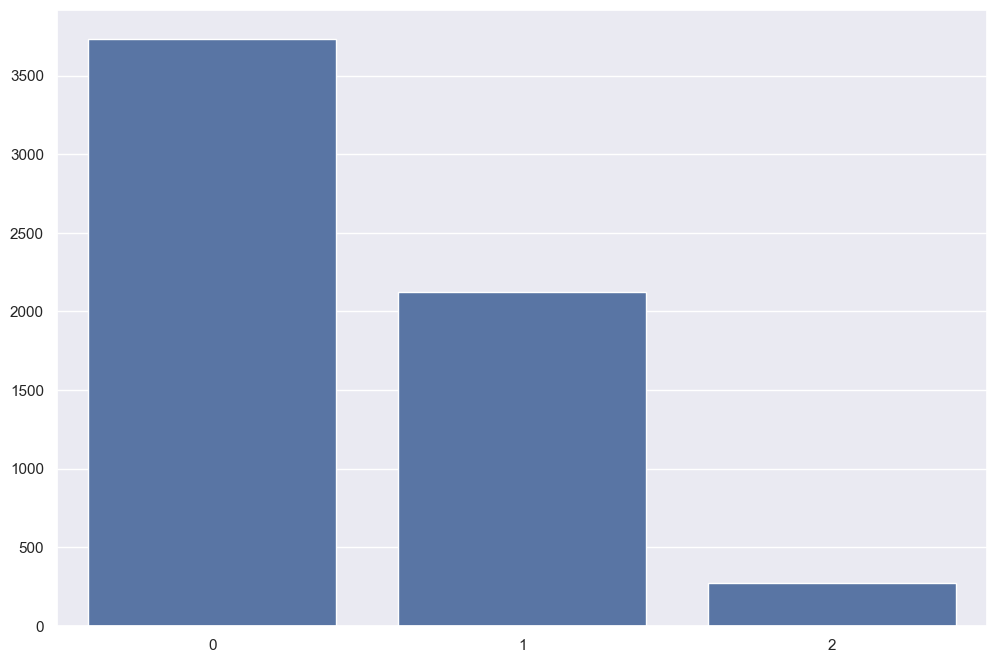

In [45]:
# Revisar la cantidad de registros en los clústeres resultado
labels = res_kmeans.labels_
df_modelk_norm['Cluster'] = labels
cluster_distrib = df_modelk_norm['Cluster'].value_counts()
fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');

In [46]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_modelk_norm.groupby('Cluster').count()

averageRating  numVotes  movie  tvMiniSeries  tvMovie  tvSeries  \
Cluster                                                                    
0                 3733      3733   3733          3733     3733      3733   
1                 2124      2124   2124          2124     2124      2124   
2                  275       275    275           275      275       275   

         titleType  
Cluster             
0             2940  
1             1675  
2              214

In [47]:
# Consultamos algunos de los registros en el clúster 1.
#Transformar el contenido de las columnas a arreglo
cols_number2 = df_modelk_norm.to_numpy()
cols_number2[res_kmeans.labels_ == 1, len(cols_transformed)-1]

array([1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0], dtype=object)

### 4.5.2 Graficar comportamiento en parejas de atributos de acuerdo a la agrupación

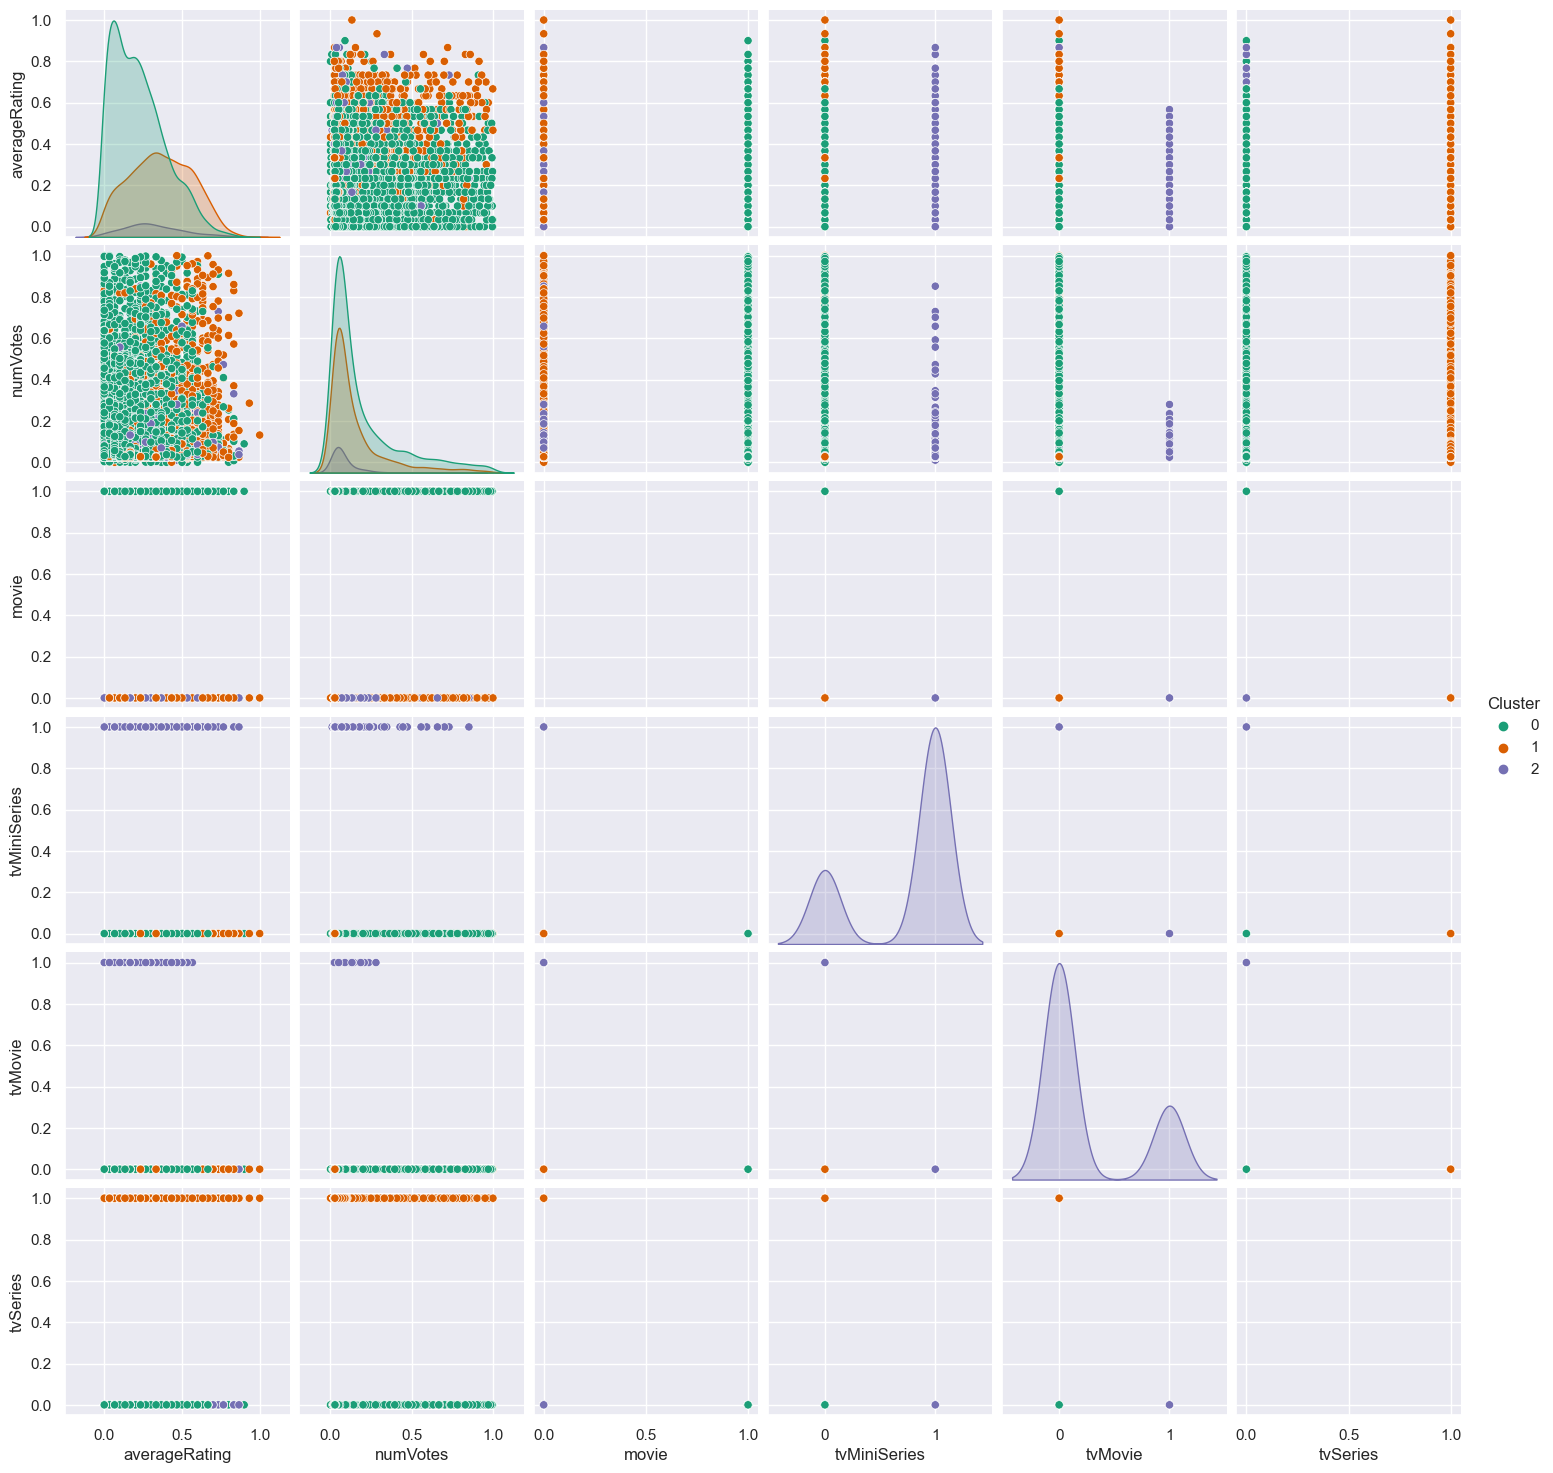

In [48]:
# El análisis de la gráfica es más dificil ya que son más columnas. Podrías filtrar las columnas para entender mejor el gráfico
# Ajustar la paleta de colores para ver mejor
sns.pairplot(data=df_modelk_norm, hue="Cluster", palette="Dark2")

### 4.5.3  Graficar dos atributos y ver la relación con las agrupaciones

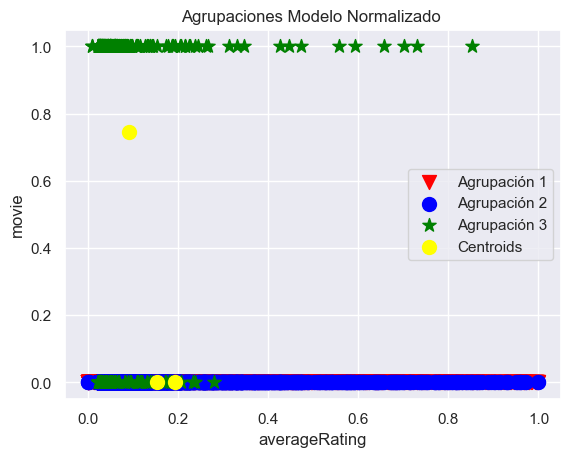

In [49]:
# El análisis lo haremos por pareja de atributos, en este caso 
plt.scatter(cols_number2[res_kmeans.labels_ == 0, 1], cols_number2[kmeans.labels_ == 0, 3], s = 100, marker='v', c = 'red', label = 'Agrupación 1')
plt.scatter(cols_number2[res_kmeans.labels_ == 1, 1], cols_number2[kmeans.labels_ == 1, 3], s = 100, marker='o', c = 'blue', label = 'Agrupación 2')
plt.scatter(cols_number2[res_kmeans.labels_ == 2, 1], cols_number2[kmeans.labels_ == 2, 3], s = 100, marker='*', c = 'green', label = 'Agrupación 3')

plt.scatter(res_kmeans.cluster_centers_[:, 1], res_kmeans.cluster_centers_[:, 3], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Agrupaciones Modelo Normalizado ')
plt.xlabel(cols_transformed[0])
plt.ylabel(cols_transformed[2])
plt.legend()
plt.show()

In [50]:
# Revisemos los valores de los centroides de los clústeres generados
print('Centroides: [[',cols_transformed[0], ' ' , cols_transformed[2], ']]', res_kmeans.cluster_centers_)

Centroides: [[ averageRating   movie ]] [[ 2.22287704e-01  1.94932262e-01  1.00000000e+00 -1.52655666e-16
   2.42861287e-17  7.21644966e-16]
 [ 3.62900188e-01  1.55078714e-01 -9.99200722e-16 -8.32667268e-17
   2.42861287e-17  1.00000000e+00]
 [ 3.19272727e-01  9.09957578e-02 -4.44089210e-16  7.45454545e-01
   2.54545455e-01 -2.77555756e-16]]


### 4.5.4  Graficar los centroides de los grupos

In [51]:
cols_transformed

['averageRating', 'numVotes', 'movie', 'tvMiniSeries', 'tvMovie', 'tvSeries']

In [52]:
kmeans.cluster_centers_.tolist()

[[0.22228770425930885,
  0.1949322617016985,
  0.9999999999999989,
  -1.5265566588595902e-16,
  2.42861286636753e-17,
  7.216449660063518e-16],
 [0.36290018832391713,
  0.15507871380938823,
  -9.992007221626409e-16,
  -8.326672684688674e-17,
  2.42861286636753e-17,
  1.000000000000002],
 [0.31927272727272726,
  0.0909957577690255,
  -4.440892098500626e-16,
  0.7454545454545455,
  0.2545454545454544,
  -2.7755575615628914e-16]]

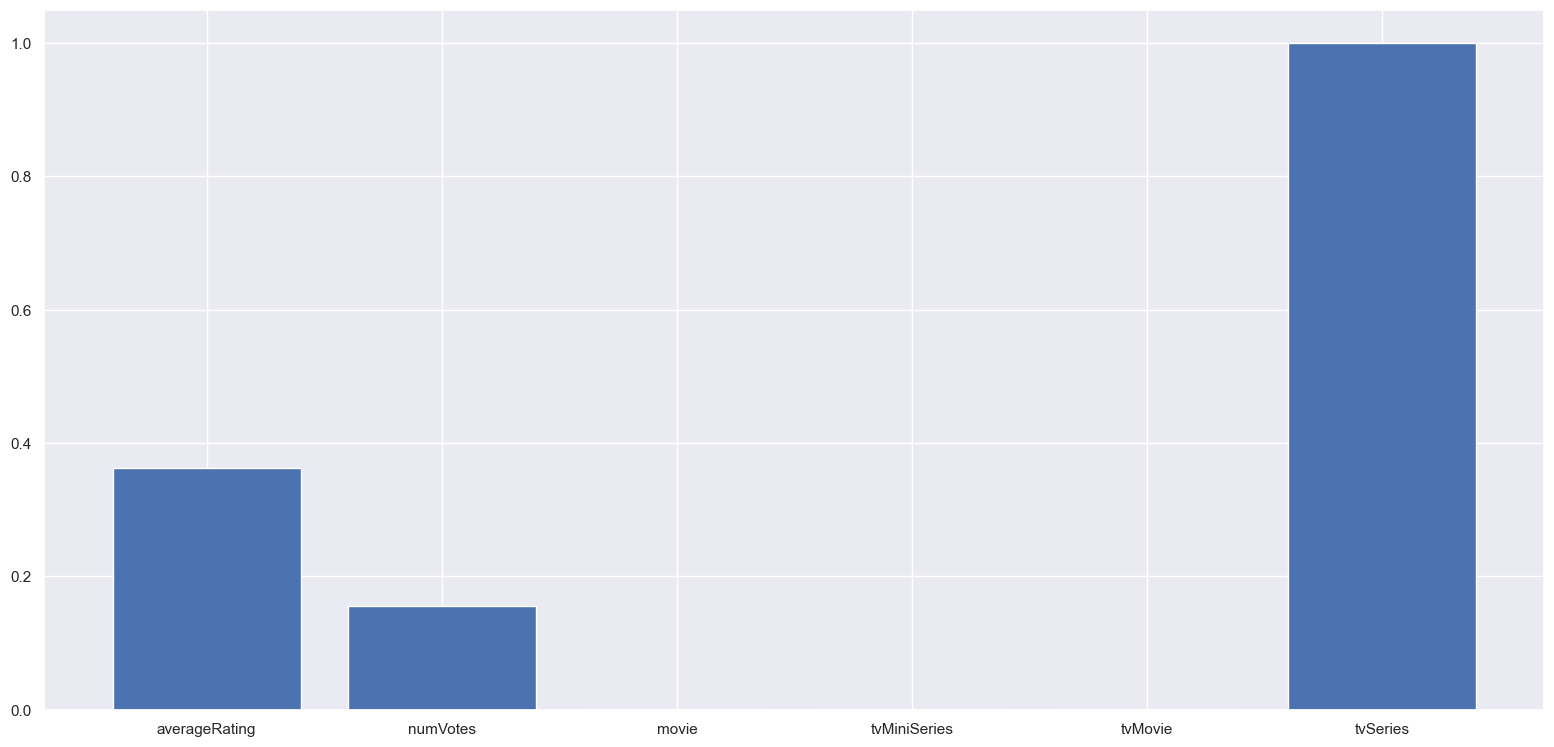

In [53]:
#visualizar los centroides de un cluster (1). 
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(cols_transformed,res_kmeans.cluster_centers_.tolist()[1])
plt.show()

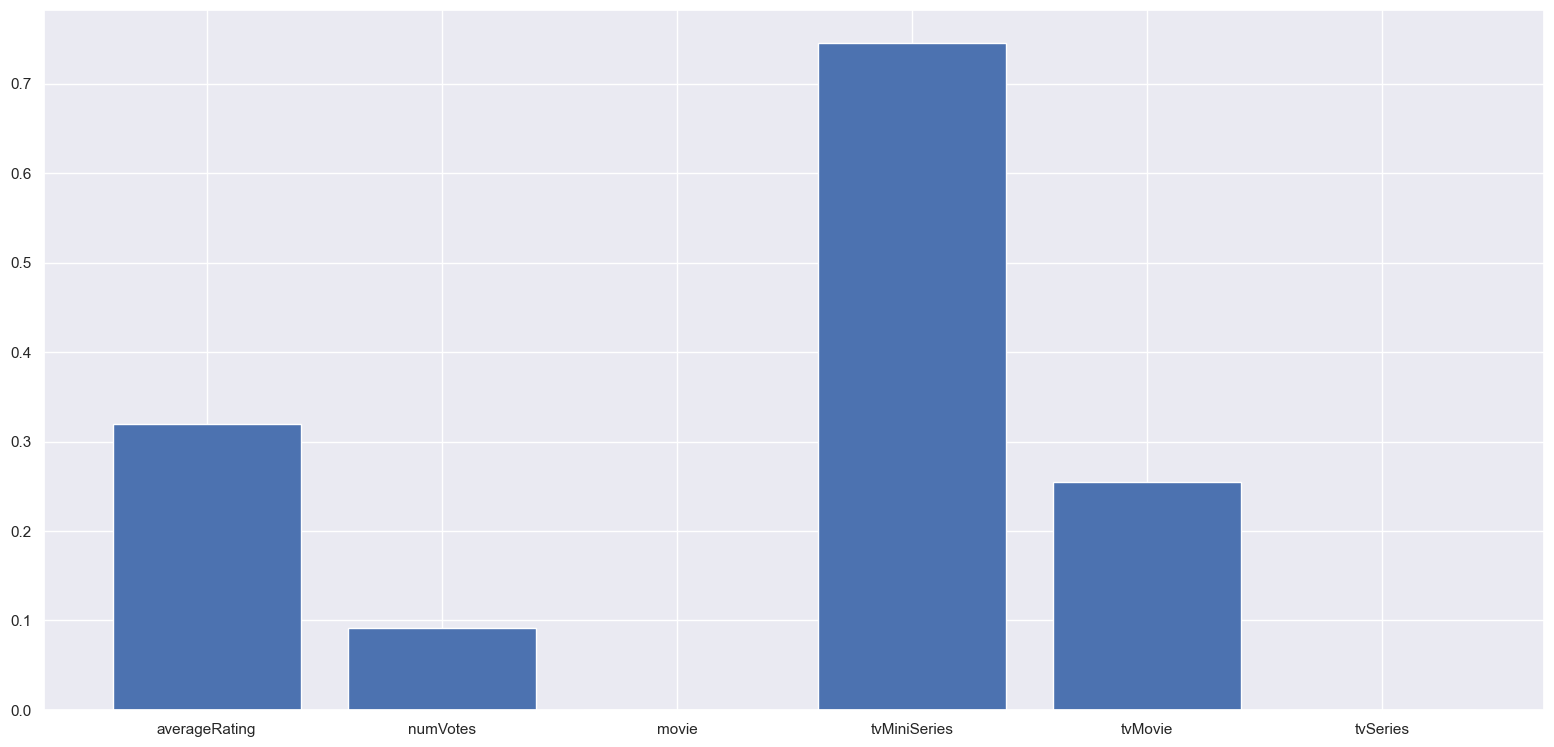

In [54]:
#visualizar los centroides de un cluster (2). 
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(cols_transformed,res_kmeans.cluster_centers_.tolist()[2])
plt.show()

### 4.5.5 Evaluar la calidad de los clústeres obtenidos

In [55]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Grupos',
                   xlabel = "Coeficiente de silueta",
                   title = 'Gráfica de silueta'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1 2]


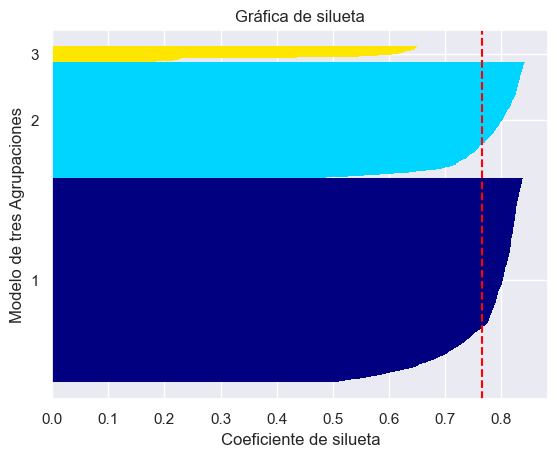

In [56]:
# Esta función puede tardar varios minutos
# Un valor cercano a 1 es un indicador de un bueno modelo. Revisa la teoría para comprender mejor el concepto
plot_silhouette(data = df_modelk_norm[cols_transformed], 
                labels = res_kmeans.labels_, 
                ylabel = 'Modelo de tres Agrupaciones')

## 4.6 Algoritmo DBSCAN

In [57]:
#Seleccionar variables
df_model_dbs=df_movies_model[cols_select].copy()

In [58]:
#Incluir en el dataframe la variable categorica 
df_model_dbs[enc.categories_[0]] = transformed.toarray()


In [59]:
#Normalizacion de los datos
mms= MinMaxScaler()
# transform data
df_movies_dbs_norm = mms.fit_transform(df_model_dbs[cols_transformed])
df_model_dbs_norm = pd.DataFrame(df_movies_dbs_norm, columns =cols_transformed)
df_model_dbs_norm.head()


averageRating  numVotes  movie  tvMiniSeries  tvMovie  tvSeries
0       0.033333  0.004305    0.0           0.0      0.0       1.0
1       0.133333  0.045070    1.0           0.0      0.0       0.0
2       0.100000  0.132454    1.0           0.0      0.0       0.0
3       0.133333  0.003622    1.0           0.0      0.0       0.0
4       0.633333  0.269661    0.0           0.0      0.0       1.0

In [60]:
#Calculo del algoritmo de dbscan bucando parametros optimos por el metodo de iteracion.
param_grid = {
    'eps': [0.1, 0.2, 0.3],
    'min_samples': [10, 20, 30]
}

best_score = -1
best_params = {}

for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    dbscan.fit(df_model_dbs_norm)
    labels = dbscan.labels_
    
    
    # Calculate the silhouette score
    score = silhouette_score(df_model_dbs_norm, labels)
    
    if score > best_score:
        best_score = score
        best_params = params

print("Best DBSCAN Parameters:", best_params)
print("Best Silhouette Score:", best_score)

Best DBSCAN Parameters: {'eps': 0.2, 'min_samples': 10}
Best Silhouette Score: 0.7697003607991271


In [61]:
#Modelo con los mejores parametros

db = DBSCAN(eps=0.2, min_samples=10).fit(df_model_dbs_norm)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 7


### 4.6.1 Visualizar resultados

In [62]:
#Sacar datos por cluster
df_model_dbs_norm['Cluster'] = labels
df_model_dbs_norm.groupby('Cluster').count()

averageRating  numVotes  movie  tvMiniSeries  tvMovie  tvSeries
Cluster                                                                 
-1                   7         7      7             7        7         7
 0                2124      2124   2124          2124     2124      2124
 1                3733      3733   3733          3733     3733      3733
 2                 198       198    198           198      198       198
 3                  70        70     70            70       70        70

In [63]:
#Transformar el contenido de las columnas a arreglo
cols_number = df_model_dbs_norm.to_numpy()
cols_number[labels == 0, len(cols_transformed)-1]

array([1., 1., 1., ..., 1., 1., 1.])

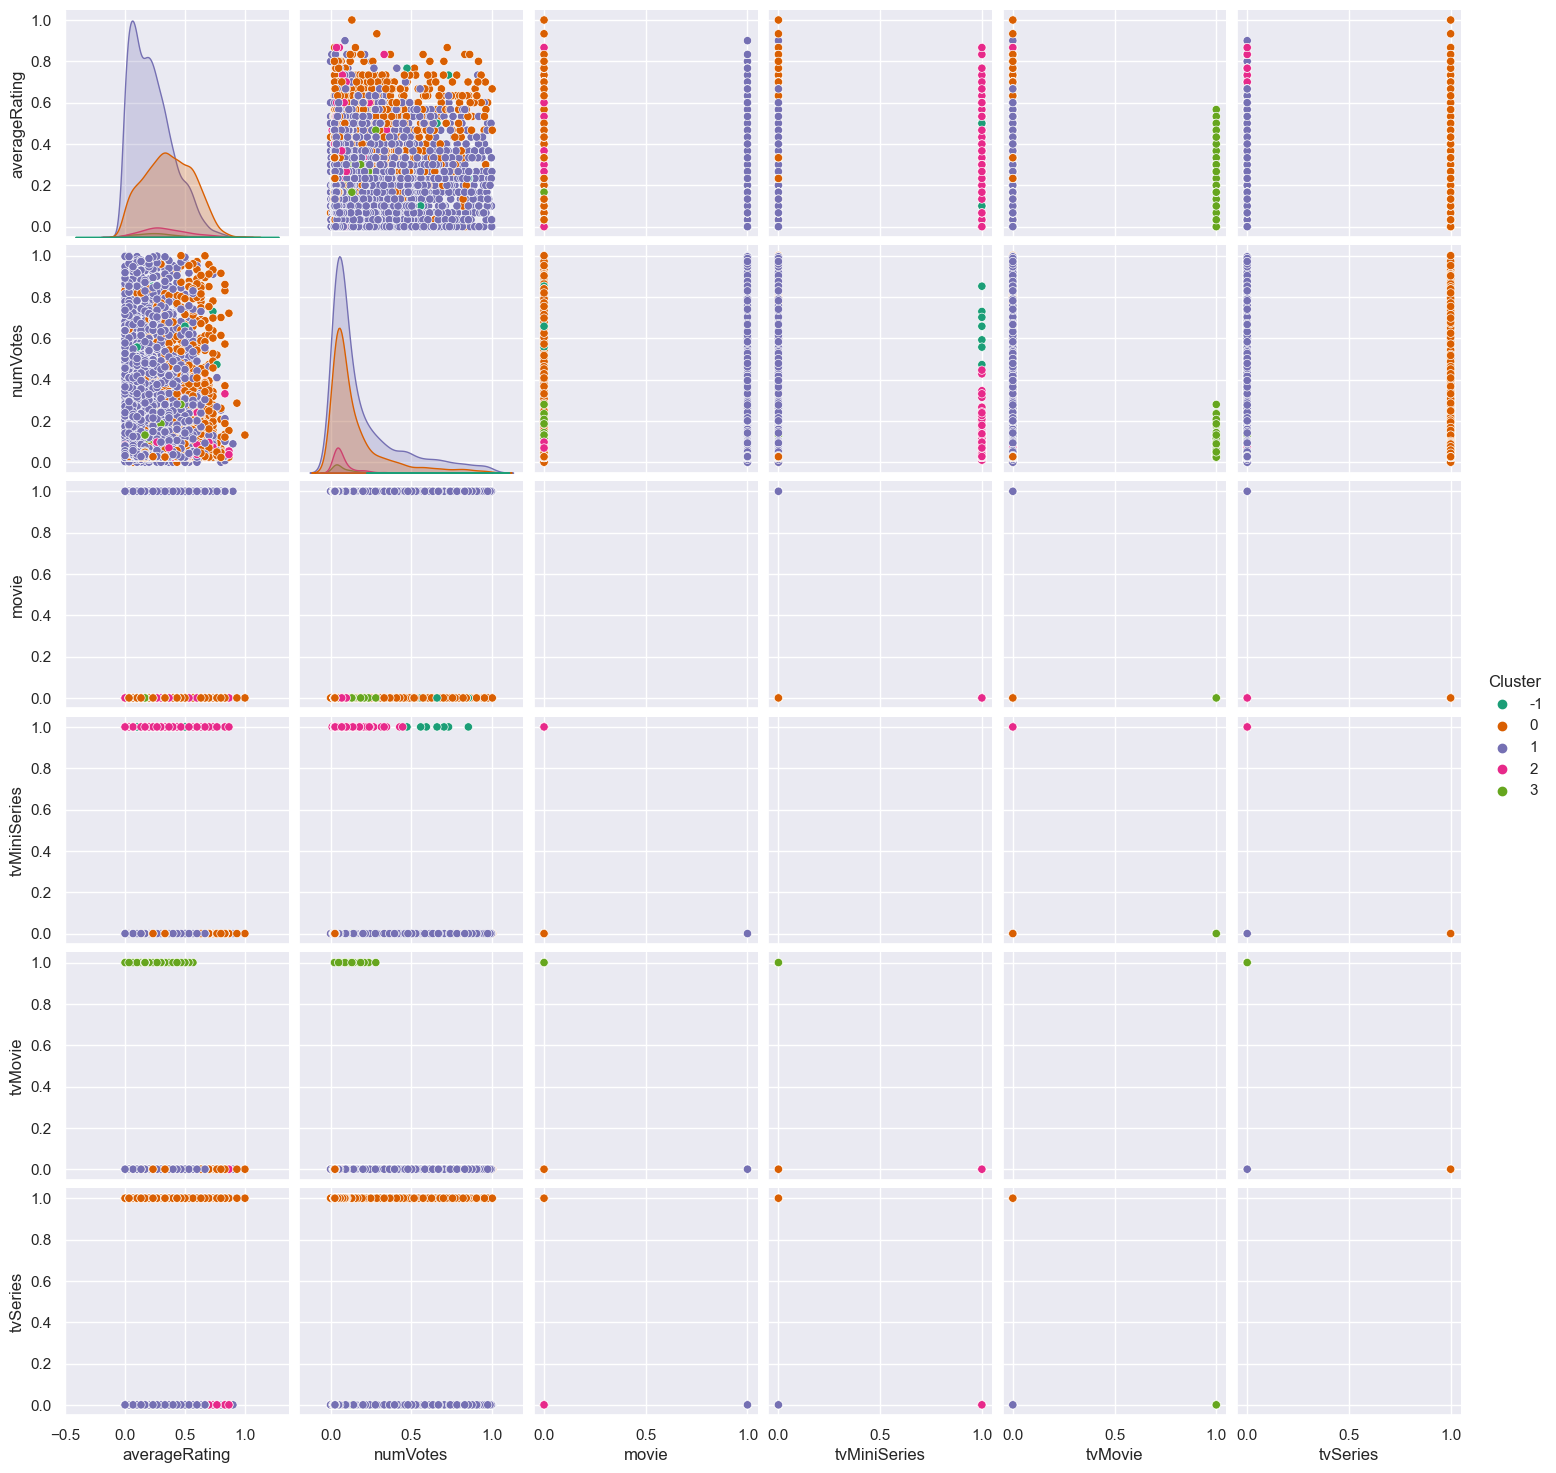

In [64]:
# Ver relaciones encontradas en el modelo con los labels
sns.pairplot(df_model_dbs_norm, hue="Cluster", palette="Dark2")

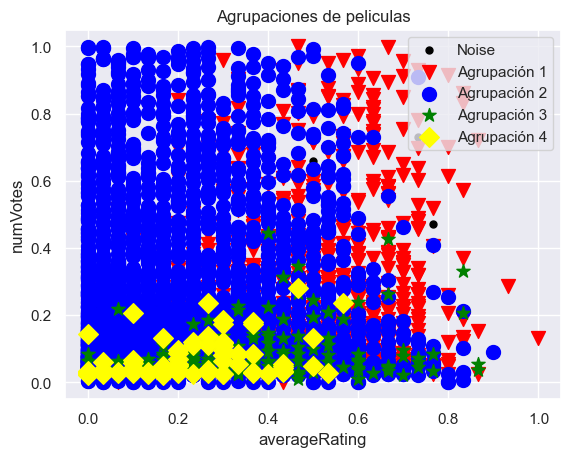

In [65]:
# Analisis de relacion mas cercano
plt.scatter(cols_number[labels == -1, 0], cols_number[labels == -1, 1], s = 100, marker='.', c = 'black', label = 'Noise')
plt.scatter(cols_number[labels == 0, 0], cols_number[labels == 0, 1], s = 100, marker='v', c = 'red', label = 'Agrupación 1')
plt.scatter(cols_number[labels == 1, 0], cols_number[labels == 1, 1], s = 100, marker='o', c = 'blue', label = 'Agrupación 2')
plt.scatter(cols_number[labels == 2, 0], cols_number[labels == 2, 1], s = 100, marker='*', c = 'green', label = 'Agrupación 3')
plt.scatter(cols_number[labels == 3, 0], cols_number[labels == 3, 1], s = 100, marker='D', c = 'yellow', label = 'Agrupación 4')


plt.title('Agrupaciones de peliculas')
plt.xlabel(cols_transformed[0])
plt.ylabel(cols_transformed[1])
plt.legend()
plt.show()

### 4.6.2 Evaluar la calidad del modelo

[-1  0  1  2  3]


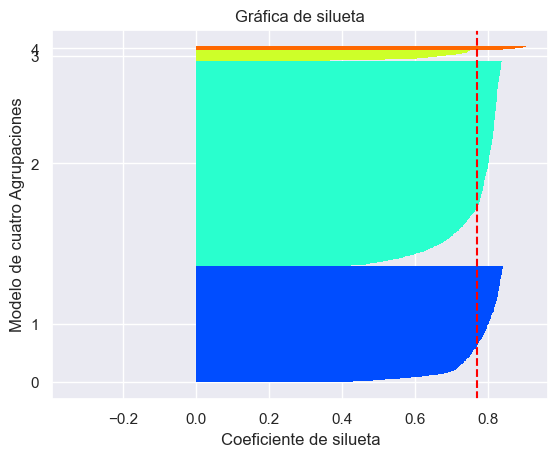

In [66]:
#Creación de la silueta para analizar la calidad del modelo
plot_silhouette(data = df_model_dbs_norm[cols_transformed], 
                labels = labels, 
                ylabel = 'Modelo de cuatro Agrupaciones')